## Loan Application Status Prediction

#### Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

#### Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

### Importing libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np
%matplotlib inline

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

#### Importing data

In [6]:
train=pd.read_csv(r"C:\Users\ROHIT RAJAN\Downloads\loan_prediction.txt")



In [7]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
train.shape

(614, 13)

In [10]:
train.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
train.count

<bound method DataFrame.count of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849         

### Data Analysis and Cleaning

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train.isnull().sum().sum()

149

In [14]:
train.shape

(614, 13)

### Dropping unnecessary rows and data

In [15]:
train = train.drop('Loan_ID', axis=1)
train = train.dropna(how='any', subset=['LoanAmount', 'Married', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History'])

In [16]:
train.shape

(502, 12)

In [17]:
train.isnull().sum().sum()

22

In [18]:
train['Gender'] = train['Gender'].fillna(value='Can\'t say')
train['Dependents'] = train['Dependents'].fillna(value=0)
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(value=train['Loan_Amount_Term'].mean())

In [19]:
train.isnull().sum().sum()

0

### Cleared all null values

In [20]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:>

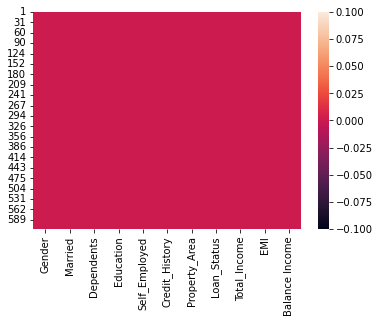

In [90]:
sns.heatmap(train.isnull())

### encoding our values from categorical to numerical data so that it would be easier for data modelling.

#### Using label Encoder

In [21]:
le = LabelEncoder()

print('Gender : ',train['Gender'].unique())
train['Gender'] = le.fit_transform(train['Gender'])
print('Gender : ',train['Gender'].unique())
print('')
print('Married : ',train['Married'].unique())
train['Married'] = le.fit_transform(train['Married'])
print('Married : ',train['Married'].unique())
print('')
print('Education : ',train['Education'].unique())
train['Education'] = le.fit_transform(train['Education'])
print('Education : ',train['Education'].unique())
print('')
print('Self_Employed : ',train['Self_Employed'].unique())
train['Self_Employed'] = le.fit_transform(train['Self_Employed'])
print('Self_Employed : ',train['Self_Employed'].unique())
print('')
print('Property_Area : ',train['Property_Area'].unique())
train['Property_Area'] = le.fit_transform(train['Property_Area'])
print('Property_Area : ',train['Property_Area'].unique())
print('')
print('Loan_Status : ',train['Loan_Status'].unique())
train['Loan_Status'] = le.fit_transform(train['Loan_Status'])
print('Loan_Status : ',train['Loan_Status'].unique())

Gender :  ['Male' 'Female' "Can't say"]
Gender :  [2 1 0]

Married :  ['Yes' 'No']
Married :  [1 0]

Education :  ['Graduate' 'Not Graduate']
Education :  [0 1]

Self_Employed :  ['No' 'Yes']
Self_Employed :  [0 1]

Property_Area :  ['Rural' 'Urban' 'Semiurban']
Property_Area :  [0 2 1]

Loan_Status :  ['N' 'Y']
Loan_Status :  [0 1]


In [22]:
train.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

### Converting object types to integer types

In [23]:
train['Gender'] = train['Gender'].astype('int')
train['Married'] = train['Married'].astype('int')
train['Education'] = train['Education'].astype('int')
train['Self_Employed'] = train['Self_Employed'].astype('int')
train['Property_Area'] = train['Property_Area'].astype('int')
train['Property_Area'] = train['Property_Area'].astype('int')
train['Loan_Status'] = train['Loan_Status'].astype('int')

In [24]:
train['Dependents'] = train['Dependents'].replace('3+',3)
train['Dependents'] = train['Dependents'].astype('int')

In [25]:
train['ApplicantIncome'] = train['ApplicantIncome']/1000
train['CoapplicantIncome'] = train['CoapplicantIncome']/1000
train['LoanAmount'] = train['LoanAmount']/1000
train['Loan_Amount_Term'] = train['Loan_Amount_Term']/1000

In [26]:
train.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

### Visualizing data

<AxesSubplot:>

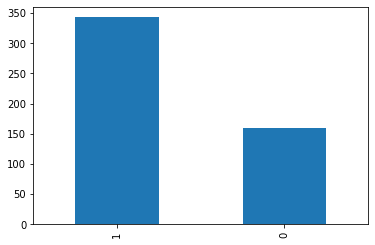

In [33]:
train['Loan_Status'].value_counts().plot.bar()

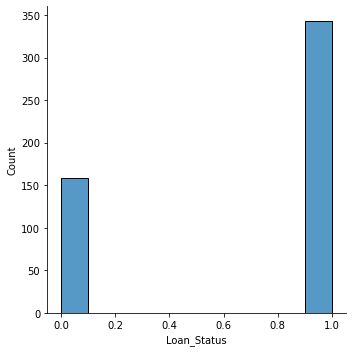

In [35]:
sns.displot(train["Loan_Status"])

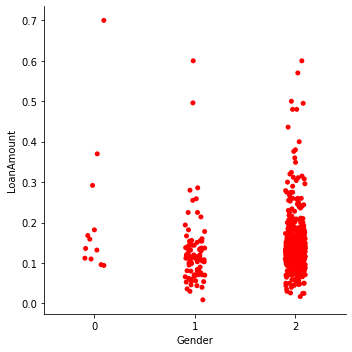

In [32]:
sns.catplot(x="Gender", y="LoanAmount", data=train, color='red');

### Male have taken more loan as compared to Fmale or Other in the above plots

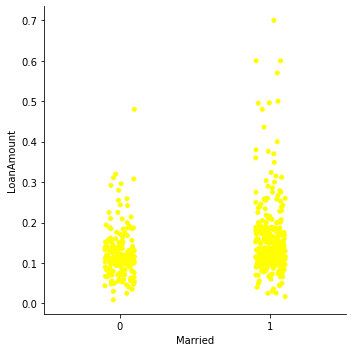

In [38]:
sns.catplot(x="Married", y="LoanAmount", data=train, color='yellow');

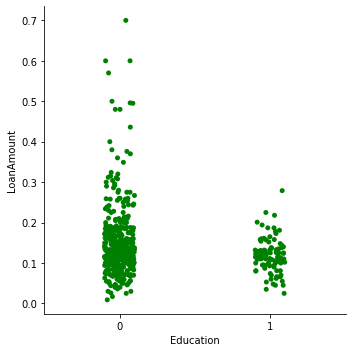

In [39]:
sns.catplot(x="Education", y="LoanAmount", data=train, color='green');

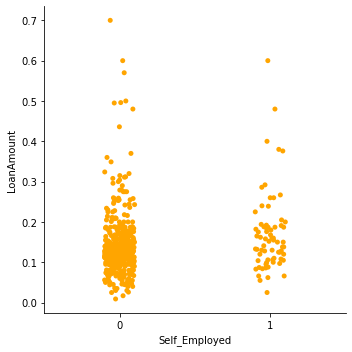

In [40]:
sns.catplot(x="Self_Employed", y="LoanAmount", data=train, color='orange');

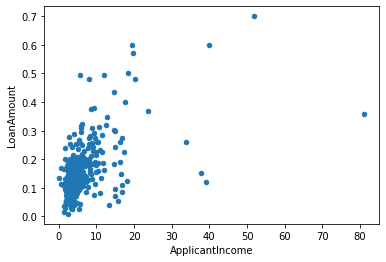

In [41]:
plot = train.plot.scatter('ApplicantIncome','LoanAmount')

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

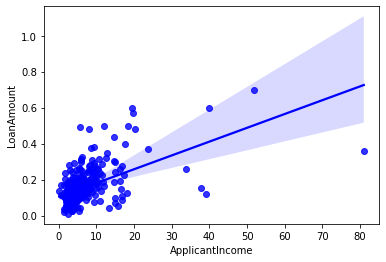

In [46]:
sns.regplot('ApplicantIncome','LoanAmount', data=train, color='blue')

It is clearly visible from above regplot that:

People with low income tend to take loan more
Also, people with high income take hogh amound of loan for big investments

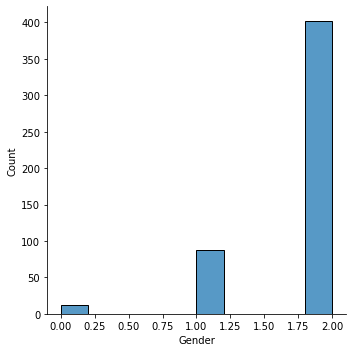

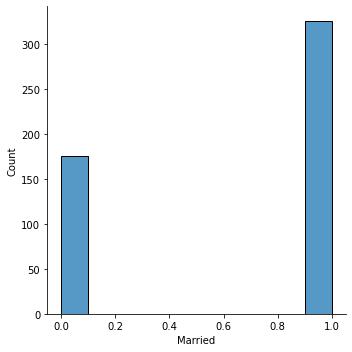

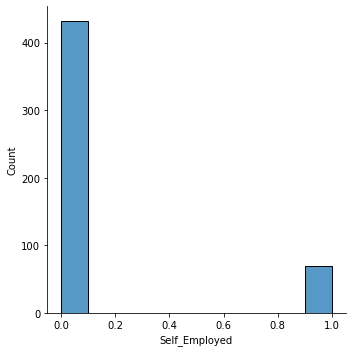

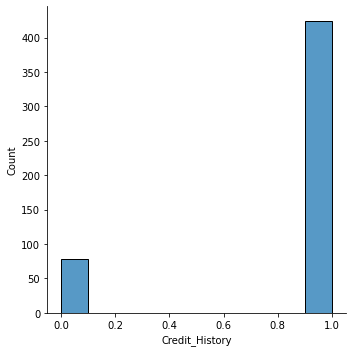

In [89]:
sns.displot(train["Gender"])
sns.displot(train["Married"])
sns.displot(train["Self_Employed"])
sns.displot(train["Credit_History"])

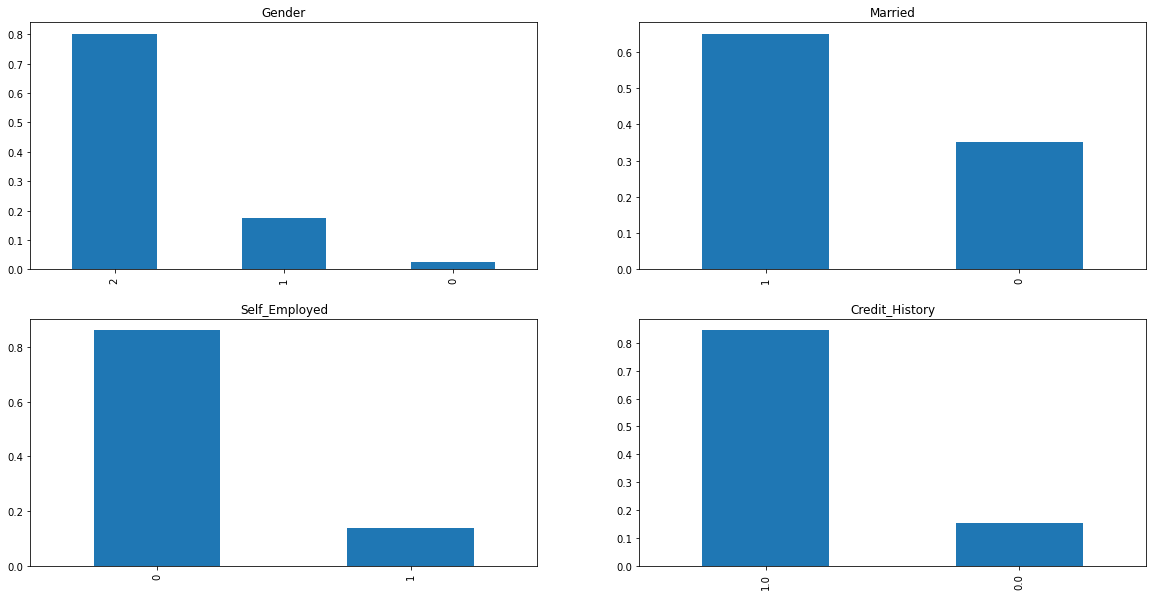

In [47]:
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in them dataset are self employed.
Around 85% applicants have repaid their debts.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

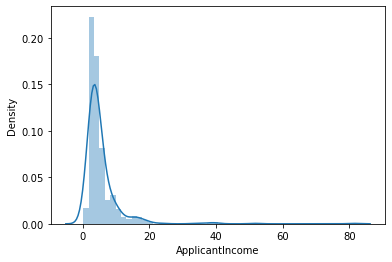

In [50]:
sns.distplot(train['ApplicantIncome'])

#### It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed

<AxesSubplot:>

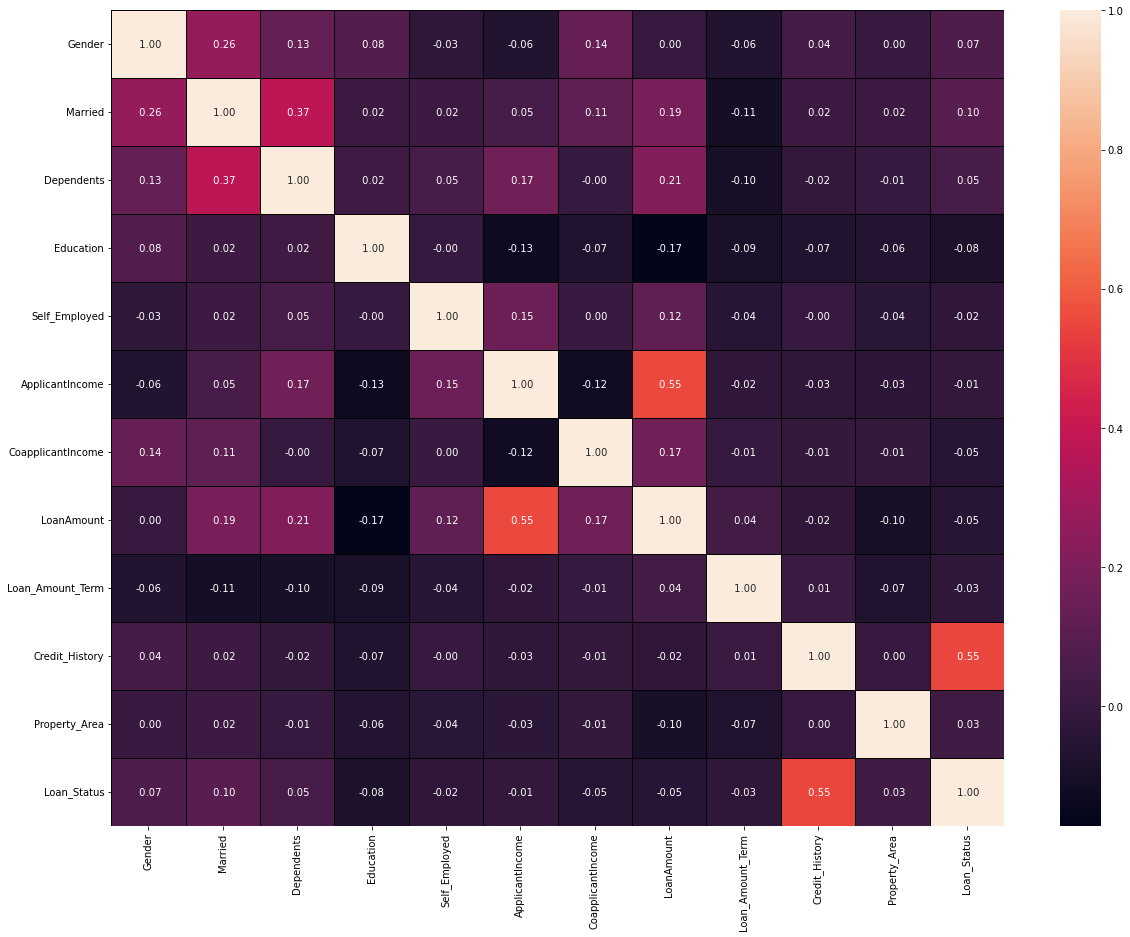

In [51]:
plt.figure(figsize=(20,15))

sns.heatmap(train.corr(),annot= True,linewidths=1,linecolor='black',fmt=' .2f' )

In [52]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,2,1,1,0,0,4.583,1.508,0.128,0.36,1.0,0,0
2,2,1,0,0,1,3.000,0.000,0.066,0.36,1.0,2,1
3,2,1,0,1,0,2.583,2.358,0.120,0.36,1.0,2,1
4,2,0,0,0,0,6.000,0.000,0.141,0.36,1.0,2,1
5,2,1,2,0,1,5.417,4.196,0.267,0.36,1.0,2,1


### Modelling Data

##### Train Test Split

In [55]:
y = train['Loan_Status']
x = train.drop(['Loan_Status'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=4)

#### Using Logistic Regression

In [56]:
lr = LogisticRegression()

In [57]:
lr.fit(x_train,y_train)

LogisticRegression()

#### Applying R square method to evaluate the model

In [58]:
lr.score(x_test, y_test)*100

75.59523809523809

In [59]:
lr.score(x_train, y_train)*100

84.13173652694611

In [60]:
y_pred = lr.predict(x_test)

#### Naive Bayes..

In [61]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [62]:
nb.score(x_train, y_train)

0.8323353293413174

In [63]:
nb.score(x_test, y_test)

0.75

#### KNN

In [64]:
knn = KNeighborsClassifier(n_neighbors=10)

In [65]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
knn.score(x_test, y_test)

0.625

#### Random Forest

In [67]:
# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train) 

RandomForestRegressor(random_state=0)

In [68]:
y_pred_test = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)

In [69]:
display(regressor.score(x_test,y_test))

0.18117587301587323

In [70]:
display(regressor.score(x_train,y_train))

0.897424518557423

### Support Vector Machines 

In [71]:
svc = svm.SVC(kernel ='linear', C = 1).fit(x_train, y_train) 

In [72]:
svc.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [73]:
svc.score(x_test, y_test)

0.7559523809523809

In [74]:
svc.score(x_train, y_train)

0.8383233532934131

### Taking All Models Together 

In [76]:
models = {'LR':LogisticRegression(), 'NB':GaussianNB(), 'KNN':KNeighborsClassifier(n_neighbors=10), 'RF':RandomForestRegressor(n_estimators = 100),'SVM':svm.SVC()}
accuracy_list = {}
for key,value in models.items():
    model = value
    model.fit(x_train, y_train)
    accuracy_list.update({key:model.score(x_test, y_test)})

In [77]:
accuracy_list

{'LR': 0.7559523809523809,
 'NB': 0.75,
 'KNN': 0.625,
 'RF': 0.17987301587301596,
 'SVM': 0.7083333333333334}

In [78]:
print('Best model is : `{}` '.format(max(accuracy_list, key=accuracy_list.get)))

Best model is : `LR` 


#### Additional knowledge

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.
EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI’s might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.
Balance Income - This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.

In [79]:
train['Total_Income']=(train['ApplicantIncome']+train['CoapplicantIncome'] )/1000

In [80]:
train['EMI']=train['LoanAmount']/train['Loan_Amount_Term'] 

In [81]:
train['Balance Income']=(train['Total_Income']-(train['EMI']*1000))/1000
# Multiply with 1000 to make the units equal

- Let us now drop the variables which we used to create these new features.
- Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. 
- We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [82]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

In [83]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total_Income,EMI,Balance Income
1,2,1,1,0,0,1.0,0,0,0.006091,0.355556,-0.355549
2,2,1,0,0,1,1.0,2,1,0.003000,0.183333,-0.183330
3,2,1,0,1,0,1.0,2,1,0.004941,0.333333,-0.333328
4,2,0,0,0,0,1.0,2,1,0.006000,0.391667,-0.391661
5,2,1,2,0,1,1.0,2,1,0.009613,0.741667,-0.741657


In [84]:
y = train['Loan_Status']
x = train.drop(['Loan_Status'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=4)

In [85]:
lr.fit(x_train,y_train)

LogisticRegression()

In [86]:
lr.score(x_test, y_test)

0.7559523809523809